In [527]:
import numpy as np
import gzip
import pickle
import sys
import copy
import os.path
from copy import deepcopy

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [476]:
def mix_gaussian_moments(mus, stds):
    mu_star = np.mean(mus)
    std_star = np.sqrt(np.mean([s**2 + m**2 for m, s in zip(mus, stds)]) - mu_star**2)
    return mu_star, std_star

In [522]:
def plot_uncerts(Zs):
    from matplotlib.ticker import FormatStrFormatter
    lw = 2
    grid_color = '0.1'
    grid_lw = 0.2
    title_size = 16
    label_size = 22
    tick_size = 14
    legend_size = 16
    runs=5
    no_tasks=5
    fig, ax = plt.subplots(1, no_tasks-1, figsize=(24, 3))
    for i in range(no_tasks-1):
        task = i+1
        num_heads = task+1
        mus, sds = np.zeros((runs, (task+1)*num_heads)), np.zeros((runs, (task+1)*num_heads))
        for r in range(runs):
            uncert = Zs[r]
            mu, sd = zip(*uncert[task])
            mus[r, :] = mu
            sds[r, :] = sd
        _mu = np.mean(mus, 0)
        _sd = np.mean(sds**2 + mus**2, 0) - _mu**2
        for j in range(num_heads):
            start = j*num_heads
            end = (j+1)*num_heads
            ax[i].plot(np.arange(num_heads)+1, _mu[start:end], label=str(j), marker='*', linewidth=lw,
                      markevery=[np.argmin(_mu[start:end])], markersize=16)
            ax[i].fill_between(np.arange(num_heads)+1, 
                               [m+s for m, s in zip(_mu[start:end], _sd[start:end])], 
                               [m-s for m, s in zip(_mu[start:end], _sd[start:end])], alpha=0.1)
        ax[i].set_xticks(range(1, num_heads+1))
        ax[i].set_xlabel('Tasks', fontsize=legend_size)
        ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax[i].tick_params(labelsize=tick_size)
        #ax[i].set_ylim((0.1, 0.6))
        if i == 3:
            ax[i].set_xlim((1, 7))
            ax[i].legend(fontsize=legend_size, loc='upper right')
        if i == 0:
            ax[i].set_ylabel('PE', fontsize=legend_size)
    #plt.savefig("plots/vvv.pdf", bbox_inches='tight')
    fig.show()

# CL1

# IBP normal

In [294]:
with open('../ddm/results/split_mnist_res5_split_normal_l1_mh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [295]:
with open('../ddm/results/split_mnist_res5_split_normal.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50'])

In [296]:
with open('../ddm/results/split_mnist_res5_split_mnist_mh_bl100.pkl', 'rb') as input_file:
    d_bl100 = pickle.load(input_file)
d_bl100.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [297]:
with open('results/split_mnist_vcl_h10_normal_cl2_.pkl', 'rb') as input_file:
    d_bl10 = pickle.load(input_file)
d_bl10.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [298]:
with open('results/split_mnist_vcl_h400_normal_cl2_.pkl', 'rb') as input_file:
    d_bl400 = pickle.load(input_file)
d_bl400.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [299]:
d['vcl_baselines'].keys()

dict_keys([5, 50])

In [300]:
d_bl100['vcl_baselines'].keys()

dict_keys([100])

In [301]:
ibp_acc = d['vcl_ibp'] # 5, 5, 5
vcl_result_h10 = d_bl10['vcl_baselines'][10][0,:,:,:]
vcl_result_h50 = d_baselines['vcl_h50']
vcl_result_h100 = d_bl100['vcl_baselines'][100]
vcl_result_h400 = d_bl400['vcl_baselines'][400][0,:,:,:]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h10 = np.mean(vcl_result_h10, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h400 = np.mean(vcl_result_h400, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h10 = np.nanmean(vcl_result_h10, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))
__vcl_result_h400 = np.nanmean(vcl_result_h400, (0,1))

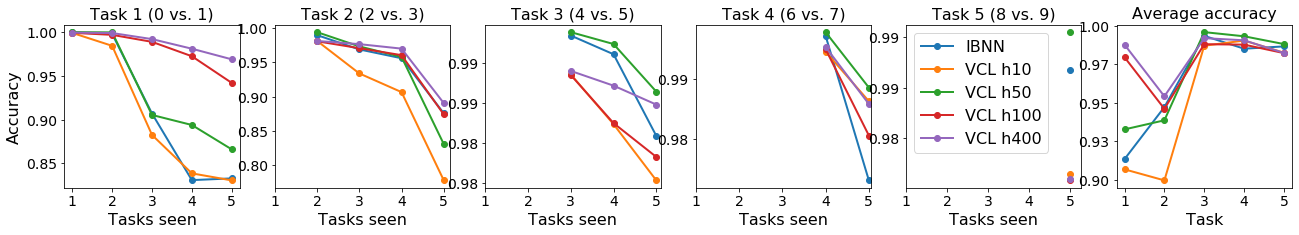

In [138]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h10[:, i]))+1, _vcl_result_h10[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h10, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h400, label='VCL h400', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/accs_split_cl1_l1.pdf", bbox_inches='tight')
fig.show()

In [302]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result_h10), np.nanmean(np.nanstd(vcl_result_h10, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h400), np.nanmean(np.nanstd(vcl_result_h400, 0))))

Overall accuracies IBP: 0.9529757520416159 pm 0.01958514019416123
Overall accuracies VCL h10: 0.9372404688994089 pm 0.02223848432611057
Overall accuracies VCL h50: 0.9587795277649633 pm 0.03920355019857497
Overall accuracies VCL h100: 0.9736987199767743 pm 0.009296121514490423
Overall accuracies VCL h400: 0.979745848854383 pm 0.004837119618720415


In [303]:
mus = [0.9372404688994089, 0.9587795277649633, 0.9736987199767743, 0.979745848854383]
stds = [0.02223848432611057, 0.03920355019857497, 0.009296121514490423, 0.004837119618720415]
print([i*100 for i in mix_gaussian_moments(mus, stds)])

[96.23661413738824, 2.835458040195945]


In [180]:
print('{0:.1f} ({1:.1f})'.format(np.median(mus)*100, (np.max(mus) - np.min(mus))*100))

96.6 (4.3)


In [305]:
print('{0:.1f} (+{1:.1f}) (-{2:.1f})'.format(np.median(mus)*100, np.max(mus)*100, np.min(mus)*100))

96.6 (+98.0) (-93.7)


In [505]:
##### Box plot params

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 14
legend_size = 16

num_layers = 2
num_tasks = 5
ticks = [str(i) for i in np.arange(5)+1]
fig_size=(4, 3)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color='black', lw=1.5)
    plt.setp(bp['whiskers'], color='black', lw=1.5)
    plt.setp(bp['caps'], color=color, lw=2)
    plt.setp(bp['medians'], color=color, lw=2)

In [176]:
Z_ibp = d['Z']
len(Z_ibp)

5

In [177]:
num_layers=1
num_tasks=5
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)

In [178]:
len(_Z_ibp)

5

In [179]:
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2115, 100)

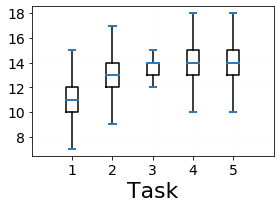

In [114]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_normal_ibp.pdf', bbox_inches='tight')
plt.show()

## CL2 new

In [306]:
with open('results/split_mnist_split_normal_l1_mh_cl2.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [307]:
ibp_acc = d['vcl_ibp'] # 5, 5, 5
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

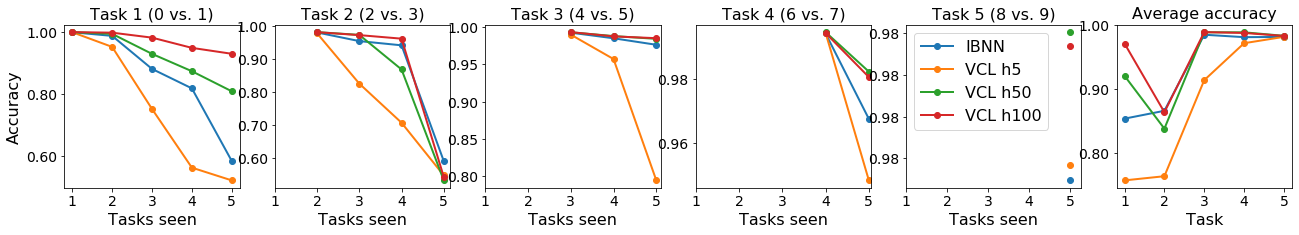

In [308]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_normal_ibp_sh_l1.pdf", bbox_inches='tight')
fig.show()

In [309]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.9085981832471574 pm 0.022515756109213293
Overall accuracies VCL h5: 0.8337444028638112 pm 0.06934054744513062
Overall accuracies VCL h50: 0.9253619673649227 pm 0.035361832779875466
Overall accuracies VCL h100: 0.9489312580437612 pm 0.012520291380895058


In [310]:
(0.9489312580437612 - 0.9085981832471574)*100

4.033307479660387

# CL2

In [311]:
with open('results/split_mnist_split_normal_l1_mh_cl2.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [312]:
d['vcl_baselines'].keys()

dict_keys([5, 50, 100])

In [313]:
with open('results/split_mnist_vcl_h400_normal_cl2_.pkl', 'rb') as input_file:
    d_bl400 = pickle.load(input_file)
d_bl400.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [314]:
with open('results/split_mnist_vcl_h10_normal_cl2_.pkl', 'rb') as input_file:
    d_bl10 = pickle.load(input_file)
d_bl10.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [315]:
ibp_acc = d['vcl_ibp'] # 5, 5, 5
vcl_result_h10 = d_bl10['vcl_baselines'][10][1,:,:,:]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
vcl_result_h400 = d_bl400['vcl_baselines'][400][1,:,:,:]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h10 = np.mean(vcl_result_h10, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h400 = np.mean(vcl_result_h400, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h10 = np.nanmean(vcl_result_h10, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))
__vcl_result_h400 = np.nanmean(vcl_result_h400, (0,1))

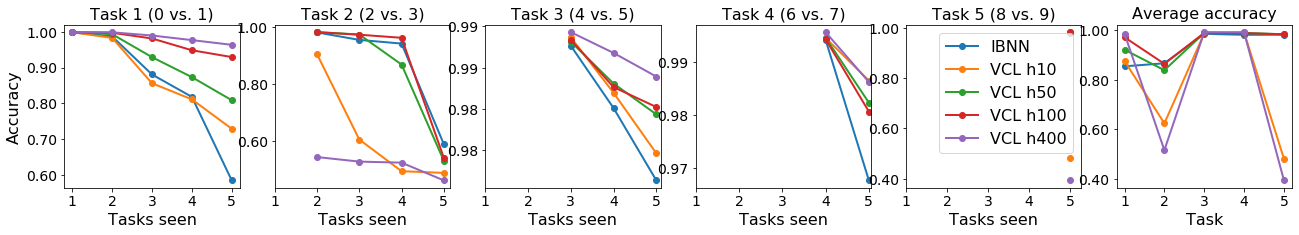

In [316]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h10[:, i]))+1, _vcl_result_h10[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h10, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h400, label='VCL h400', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_normal_ibp_sh_l1.pdf", bbox_inches='tight')
fig.show()

In [317]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result_h10), np.nanmean(np.nanstd(vcl_result_h10, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h400), np.nanmean(np.nanstd(vcl_result_h400, 0))))

Overall accuracies IBP: 0.9085981832471574 pm 0.022515756109213293
Overall accuracies VCL h10: 0.8194422601268466 pm 0.061473553106640336
Overall accuracies VCL h50: 0.9253619673649227 pm 0.035361832779875466
Overall accuracies VCL h100: 0.9489312580437612 pm 0.012520291380895058
Overall accuracies VCL h400: 0.8225050800775385 pm 0.018893923296132573


In [318]:
mus = [0.8194422601268466, 0.9253619673649227, 0.9489312580437612, 0.8225050800775385]
stds = [0.061473553106640336, 0.035361832779875466, 0.012520291380895058, 0.018893923296132573]
print([i*100 for i in mix_gaussian_moments(mus, stds)])

[87.90601414032672, 6.950142757582325]


In [319]:
print('{0:.1f} ({1:.1f})'.format(np.median(mus)*100, (np.max(mus) - np.min(mus))*100))

87.4 (12.9)


In [321]:
print('{0:.1f} ({1:.1f}) ({2:.1f})'.format(np.median(mus)*100, np.max(mus)*100, np.min(mus)*100))

87.4 (94.9) (81.9)


In [60]:
Z_ibp = d['Z']
num_layers=1
num_tasks=5
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2115, 100)

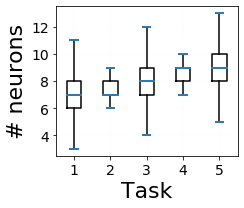

In [104]:
fig_size=(3.5,3)
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.8)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.8)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.8)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2-1)
plt.xlabel('Task', fontsize=label_size)
plt.ylabel('# neurons', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_normal_ibp_sh.pdf', bbox_inches='tight')
plt.show()

## CL3

In [322]:
with open('results/split_mnist_vcl_ibp_normal_cl3_.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [323]:
with open('results/split_mnist_vcl_h10_normal_cl3_.pkl', 'rb') as input_file:
    d_bl10 = pickle.load(input_file)
d_bl10.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [324]:
d['vcl_baselines'].keys()

dict_keys([50, 100, 400])

In [325]:
ibp_acc = d['vcl_ibp'][1,:,:,:]
vcl_result_h10 = d_bl10['vcl_baselines'][10][1,:,:,:]
vcl_result_h50 = d['vcl_baselines'][50][1,:,:,:]
vcl_result_h100 = d['vcl_baselines'][100][1,:,:,:]
vcl_result_h400 = d['vcl_baselines'][400][1,:,:,:]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h10 = np.mean(vcl_result_h10, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h400 = np.mean(vcl_result_h400, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h10 = np.nanmean(vcl_result_h10, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))
__vcl_result_h400 = np.nanmean(vcl_result_h400, (0,1))

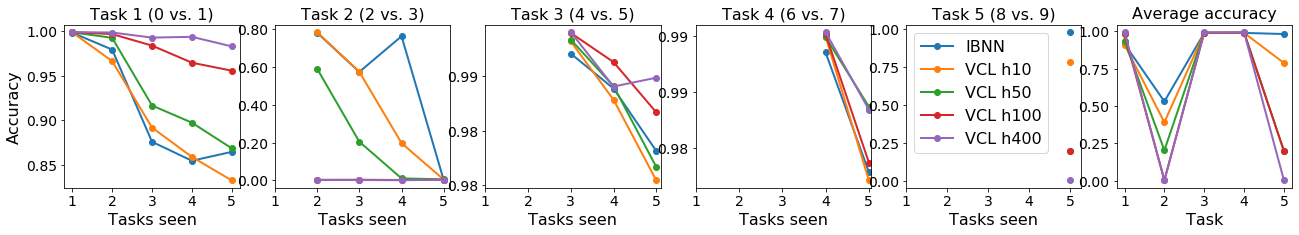

In [326]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h10[:, i]))+1, _vcl_result_h10[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h10, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h400, label='VCL h400', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_random_mh_l1.pdf", bbox_inches='tight')
fig.show()

In [327]:
print("Overall accuracies IBP: {0:.1f} pm {1:.1f}".format(np.nanmean(ibp_acc)*100, np.nanmean(np.nanstd(ibp_acc, 0))*100))
print("Overall accuracies VCL h5: {0:.1f} pm {1:.1f}".format(np.nanmean(vcl_result_h10)*100, np.nanmean(np.nanstd(vcl_result_h10, 0))*100))
print("Overall accuracies VCL h50: {0:.1f} pm {1:.1f}".format(np.nanmean(vcl_result_h50)*100, np.nanmean(np.nanstd(vcl_result_h50, 0))*100))
print("Overall accuracies VCL h100: {0:.1f} pm {1:.1f}".format(np.nanmean(vcl_result_h100)*100, np.nanmean(np.nanstd(vcl_result_h100, 0))*100))
print("Overall accuracies VCL h400: {0:.1f} pm {1:.1f}".format(np.nanmean(vcl_result_h400)*100, np.nanmean(np.nanstd(vcl_result_h400, 0))*100))

Overall accuracies IBP: 84.1 pm 9.3
Overall accuracies VCL h5: 78.9 pm 12.3
Overall accuracies VCL h50: 70.9 pm 9.5
Overall accuracies VCL h100: 67.1 pm 3.4
Overall accuracies VCL h400: 66.3 pm 0.3


In [328]:
def mix_gaussian_moments(mus, stds):
    mu_star = np.mean(mus)
    std_star = np.sqrt(np.mean([s**2 + m**2 for m, s in zip(mus, stds)]) - mu_star**2)
    return mu_star, std_star
mus = [78.9, 70.9, 67.1, 66.3]
stds = [12.3, 9.5, 3.4, 0.3]
print(mix_gaussian_moments(mus, stds))

(70.8, 9.390819985496522)


In [329]:
print('{0:.1f} ({1:.1f})'.format(np.median(mus), (np.max(mus) - np.min(mus))))

69.0 (12.6)


In [331]:
print('{0:.1f} ({1:.1f}) ({2:.1f})'.format(np.median(mus), np.max(mus), np.min(mus)))

69.0 (78.9) (66.3)


# IBP random

In [332]:
with open('../ddm/results/split_mnist_res5_random_mh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [333]:
with open('../ddm/results/split_mnist_res5_ibp_rs_split_random_noise_rs_l1_mh.pkl', 'rb') as input_file:
    d_rs = pickle.load(input_file)
d_rs.keys()

dict_keys(['vcl_ibp', 'uncerts_ibp', 'Z', 'opt_params'])

In [334]:
with open('../ddm/results/split_mnist_res5_split_mnist_random_mh_bl100.pkl', 'rb') as input_file:
    d_bl100 = pickle.load(input_file)
d_bl100.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [335]:
d_rs['opt_params']

{'learning_rate': 0.0008335670858067363,
 'alpha0': 41.35960872383244,
 'lambda_1': 0.8727902595597832,
 'lambda_2': 0.884473036312595,
 'prior_var': 0.2004417949743666,
 'alpha': 11.589043508692054,
 'ibp_samples': 10.0,
 'no_pred_samples': 10.0,
 'prior_mean': 0.0,
 'batch_size': 128.0,
 'beta0': 1.0}

In [336]:
ibp_acc_rs = d_rs['vcl_ibp']
print("Overall accuracies IBP RS: {0} pm {1}".format(np.nanmean(ibp_acc_rs), np.nanmean(np.nanstd(ibp_acc_rs, 0))))

Overall accuracies IBP RS: 0.9166935581763584 pm 0.018938228680493146


In [337]:
with open('../ddm/results/split_mnist_res5_split_random.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50'])

In [338]:
with open('results/split_mnist_vcl_h10_random_cl2_.pkl', 'rb') as input_file:
    d_bl10 = pickle.load(input_file)
d_bl10.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [339]:
with open('results/split_mnist_vcl_h400_random_cl2_.pkl', 'rb') as input_file:
    d_bl400 = pickle.load(input_file)
d_bl400.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [340]:
ibp_acc = d['vcl_ibp']
vcl_result_h10 = d_bl10['vcl_baselines'][10][0,:,:,:]
vcl_result_h50 = d_baselines['vcl_h50']
vcl_result_h100 = d_bl100['vcl_baselines'][100]
vcl_result_h400 = d_bl400['vcl_baselines'][400][0,:,:,:]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h10 = np.mean(vcl_result_h10, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h400 = np.mean(vcl_result_h400, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h10 = np.nanmean(vcl_result_h10, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))
__vcl_result_h400 = np.nanmean(vcl_result_h400, (0,1))

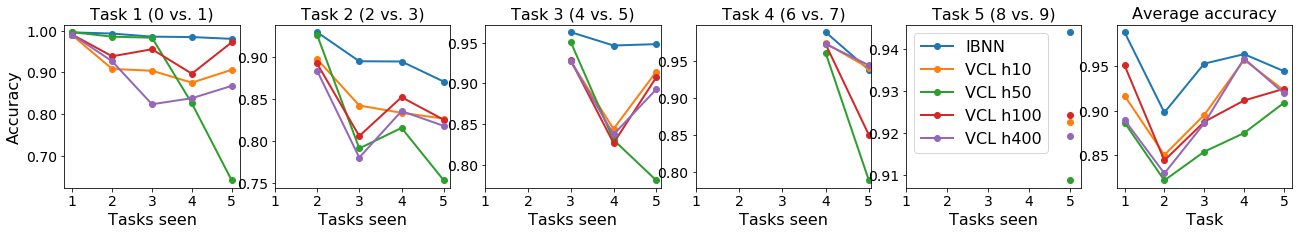

In [341]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h10[:, i]))+1, _vcl_result_h10[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h10, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h400, label='VCL h400', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/accs_split_random_cl1_l1.pdf", bbox_inches='tight')
fig.show()

In [342]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result_h10), np.nanmean(np.nanstd(vcl_result_h10, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h400), np.nanmean(np.nanstd(vcl_result_h400, 0))))

Overall accuracies IBP: 0.9505302564897856 pm 0.010747197352811237
Overall accuracies VCL h10: 0.900427695830663 pm 0.041802241372538664
Overall accuracies VCL h50: 0.8627729046356846 pm 0.05088350271217945
Overall accuracies VCL h100: 0.9026689988871416 pm 0.03195987639252343
Overall accuracies VCL h400: 0.8839889579812685 pm 0.054072066424184016


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [343]:
mus = [0.900427695830663, 0.8627729046356846, 0.9026689988871416, 0.8839889579812685]
stds = [0.041802241372538664, 0.05088350271217945, 0.03195987639252343, 0.054072066424184016]
print([i*100 for i in mix_gaussian_moments(mus, stds)])

[88.74646393336894, 4.822539736712721]


In [211]:
print('{0:.1f} ({1:.1f})'.format(np.median(mus)*100, (np.max(mus) - np.min(mus))*100))

89.2 (4.0)


In [345]:
print('{0:.1f} ({1:.1f}) ({2:.1f})'.format(np.median(mus)*100, np.max(mus)*100, np.min(mus)*100))

89.2 (90.3) (86.3)


In [201]:
Z_ibp = d['Z']
len(Z_ibp)

5

In [202]:
num_layers=1
num_tasks=5
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)

In [203]:
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2185, 100)

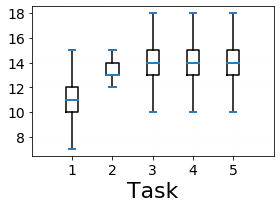

In [204]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.8)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.8)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.8)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2-1)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_random_ibp_mh.pdf', bbox_inches='tight')
plt.show()

# CL2

In [346]:
with open('results/split_mnist_random_mh_cl2.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [347]:
with open('results/split_mnist_vcl_h10_random_cl2_.pkl', 'rb') as input_file:
    d_bl10 = pickle.load(input_file)
d_bl10.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [348]:
with open('results/split_mnist_vcl_h400_random_cl2_.pkl', 'rb') as input_file:
    d_bl400 = pickle.load(input_file)
d_bl400.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [349]:
ibp_acc = d['vcl_ibp']
vcl_result_h10 = d_bl10['vcl_baselines'][10][1,:,:,:]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
vcl_result_h400 = d_bl400['vcl_baselines'][400][1,:,:,:]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h10 = np.mean(vcl_result_h10, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h400 = np.mean(vcl_result_h400, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h10 = np.nanmean(vcl_result_h10, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))
__vcl_result_h400 = np.nanmean(vcl_result_h400, (0,1))

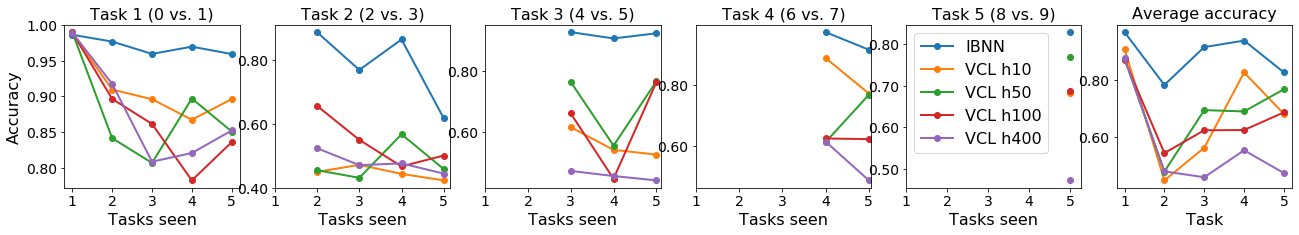

In [350]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h10[:, i]))+1, _vcl_result_h10[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h10, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h400, label='VCL h400', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_random_l1_sh.pdf", bbox_inches='tight')
fig.show()

In [351]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result_h10), np.nanmean(np.nanstd(vcl_result_h10, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h400), np.nanmean(np.nanstd(vcl_result_h400, 0))))

Overall accuracies IBP: 0.8967874238709744 pm 0.038106379056498704
Overall accuracies VCL h10: 0.6912724300843502 pm 0.1333813715290553
Overall accuracies VCL h50: 0.7021409947946 pm 0.1313745832094058
Overall accuracies VCL h100: 0.6898106963633052 pm 0.13815229541301707
Overall accuracies VCL h400: 0.6170329388661518 pm 0.09822355263769059


In [352]:
mus = [0.6912724300843502, 0.7021409947946, 0.6898106963633052, 0.6170329388661518]
stds = [0.1333813715290553, 0.1313745832094058, 0.13815229541301707, 0.09822355263769059]
print(["{:.2f}".format(i*100) for i in mix_gaussian_moments(mus, stds)])

['67.51', '13.07']


In [353]:
print('{0:.1f} ({1:.1f})'.format(np.median(mus)*100, (np.max(mus) - np.min(mus))*100))

69.1 (8.5)


In [355]:
print('{0:.1f} ({1:.1f}) ({2:.1f})'.format(np.median(mus)*100, np.max(mus)*100, np.min(mus)*100))

69.1 (70.2) (61.7)


In [354]:
Z_ibp = d['Z']
num_layers=1
num_tasks=5
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2185, 100)

In [15]:
##### Box plot params
grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 14
legend_size = 16

num_layers = 1
num_tasks = 5
ticks = [str(i) for i in np.arange(5)+1]
fig_size=(4, 3)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color='black', lw=1.5)
    plt.setp(bp['whiskers'], color='black', lw=1.5)
    plt.setp(bp['caps'], color=color, lw=2)
    plt.setp(bp['medians'], color=color, lw=2)

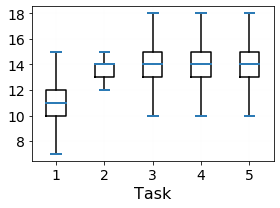

In [16]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.8)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2-1)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
#plt.savefig('plots/Zs_bp_random_ibp_sh.pdf', bbox_inches='tight')
plt.show()

## CL3

In [540]:
with open('results/split_mnist_split_random_l1_cl3_opt.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [541]:
with open('results/split_mnist_vcl_h10_random_cl3_.pkl', 'rb') as input_file:
    d_bl10 = pickle.load(input_file)
d_bl10.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [542]:
with open('results/split_mnist_vcl_h400_random_cl3_.pkl', 'rb') as input_file:
    d_bl400 = pickle.load(input_file)
d_bl400.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [543]:
with open('results/split_mnist_ibp_eps_cl3_rs_nn_lr.pkl', 'rb') as input_file:
    d_rs = pickle.load(input_file)
d_rs.keys()

dict_keys(['vcl_ibp', 'uncerts_ibp', 'Z', 'ts', 'opt_thetas'])

In [544]:
print(d_rs['opt_thetas'])
print([np.nanmean(d_rs['vcl_ibp'][i,:,:,:]) for i in range(2)])

{'lambda_1': 2.0, 'lambda_2': 1.5, 'use_uncert': False, 'alpha0': 14.40516527368829, 'ibp_samples': 10, 'no_pred_samples': 100, 'prior_mean': 0.0, 'batch_size': 512, 'beta0': 1.0, 'learning_rate': 0.0003, 'learning_rate_decay': 1.0, 'prior_var': 0.7, 'no_epochs': 1000, 'a_step': 1, 'timestamping': False, 'ts_cutoff': 0.5, 'a_start': 1}
[0.9125217367410661, 0.7865849309287446]


In [545]:
with open('results/split_mnist_ibp_eps_cl3_rs_nn_lr_ts.pkl', 'rb') as input_file:
    d_rs_ts = pickle.load(input_file)
print(d_rs_ts['opt_thetas'])
print([np.nanmean(d_rs_ts['vcl_ibp'][i,:,:,:]) for i in range(2)])

{'lambda_1': 2.25, 'lambda_2': 3.0, 'use_uncert': False, 'timestamping': False, 'alpha0': 8.148557623131348, 'ts_cutoff': 0.43638031772574865, 'ibp_samples': 10, 'no_pred_samples': 100, 'prior_mean': 0.0, 'batch_size': 512, 'beta0': 1.0, 'learning_rate': 0.0003, 'learning_rate_decay': 1.0, 'prior_var': 0.7, 'no_epochs': 1000, 'a_step': 1, 'a_start': 1}
[0.9131165120999019, 0.7625678777490825]


In [518]:
d['vcl_baselines'][50].shape

(5, 5, 5)

In [519]:
ibp_acc = d['vcl_ibp']
ibp_acc_rs = d_rs['vcl_ibp'][1,:,:,:]
vcl_result_h10 = d_bl10['vcl_baselines'][10][1,:,:,:]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
vcl_result_h400 = d_bl400['vcl_baselines'][400][1,:,:,:]
_ibp_acc = np.mean(ibp_acc, 0)
_ibp_acc_rs = np.mean(ibp_acc_rs, 0)
_vcl_result_h10 = np.mean(vcl_result_h10, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h400 = np.mean(vcl_result_h400, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__ibp_acc_rs = np.nanmean(ibp_acc_rs, (0,1))
__vcl_result_h10 = np.nanmean(vcl_result_h10, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))
__vcl_result_h400 = np.nanmean(vcl_result_h400, (0,1))

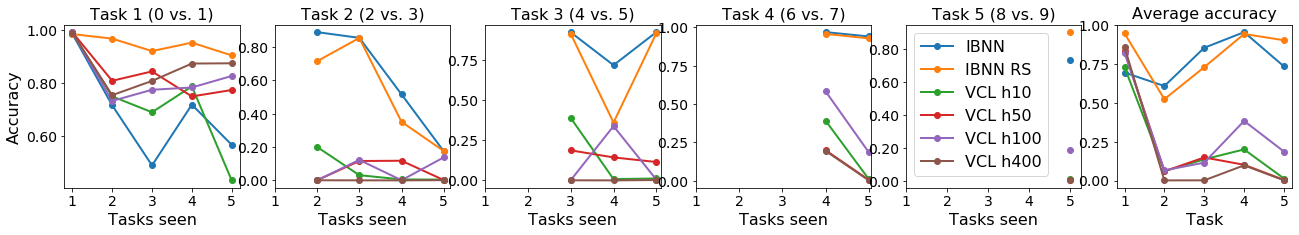

In [520]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_acc_rs[:, i]))+1, _ibp_acc_rs[:, i], label='IBNN RS', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h10[:, i]))+1, _vcl_result_h10[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc_rs))+1, __ibp_acc_rs, label='IBNN RS', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h10, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h400, label='VCL h400', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_random_l1_sh.pdf", bbox_inches='tight')
fig.show()

In [521]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0)) ))
print("Overall accuracies IBP RS: {0} pm {1}".format(np.nanmean(ibp_acc_rs), np.nanmean(np.nanstd(ibp_acc_rs, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result_h10), np.nanmean(np.nanstd(vcl_result_h10, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h400), np.nanmean(np.nanstd(vcl_result_h400, 0))))

Overall accuracies IBP: 0.7405325257093176 pm 0.21010784824466885
Overall accuracies IBP RS: 0.7865849309287446 pm 0.11656345349333831
Overall accuracies VCL h10: 0.3140046251697443 pm 0.14910139941921394
Overall accuracies VCL h50: 0.3369913779180637 pm 0.19169509098757573
Overall accuracies VCL h100: 0.37787716544062466 pm 0.18909482847032638
Overall accuracies VCL h400: 0.30023540452477526 pm 0.06271724227607475


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [366]:
print('{0:.1f} ({1:.1f}) ({2:.1f})'.format(np.median(mus)*100, np.max(mus)*100, np.min(mus)*100))

32.5 (37.8) (30.0)


In [526]:
str(np.nanmean(np.nanstd(np.zeros((10, 5, 5)), 0)))

'0.0'

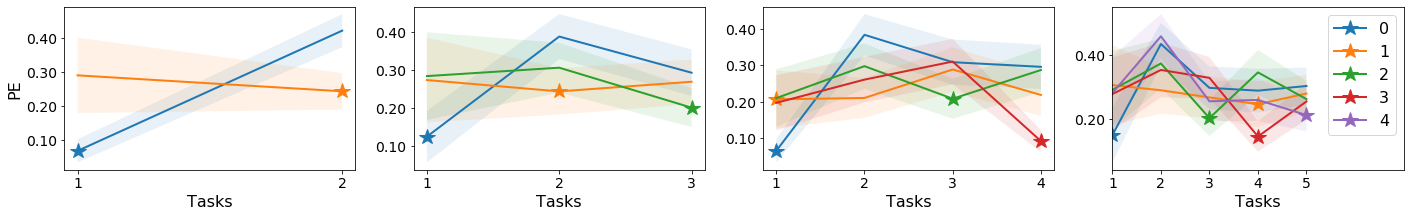

In [523]:
plot_uncerts(d_rs['uncerts_ibp'])

# Background MNIST

# CL1

In [367]:
with open('../ddm/results/split_mnist_res5_background_mh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [368]:
#split_mnist_res5_split_background.pkl
with open('../ddm/results/split_mnist_res5_split_background.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50'])

In [369]:
#split_mnist_res5_split_background.pkl
with open('../ddm/results/split_mnist_res5_split_mnist_bck_mh_bl100.pkl', 'rb') as input_file:
    d_bl100 = pickle.load(input_file)
d_bl100.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [370]:
with open('results/split_mnist_vcl_h10_images_cl2_.pkl', 'rb') as input_file:
    d_bl10 = pickle.load(input_file)
d_bl10.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [371]:
with open('results/split_mnist_vcl_h400_images_cl2_.pkl', 'rb') as input_file:
    d_bl400 = pickle.load(input_file)
d_bl400.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [372]:
ibp_acc = d['vcl_ibp']
vcl_result_h10 = d_bl10['vcl_baselines'][10][0,:,:,:]
vcl_result_h50 = d_baselines['vcl_h50']
vcl_result_h100 = d_bl100['vcl_baselines'][100]
vcl_result_h400 = d_bl400['vcl_baselines'][400][0,:,:,:]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h10 = np.mean(vcl_result_h10, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h400 = np.mean(vcl_result_h400, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h10 = np.nanmean(vcl_result_h10, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))
__vcl_result_h400 = np.nanmean(vcl_result_h400, (0,1))

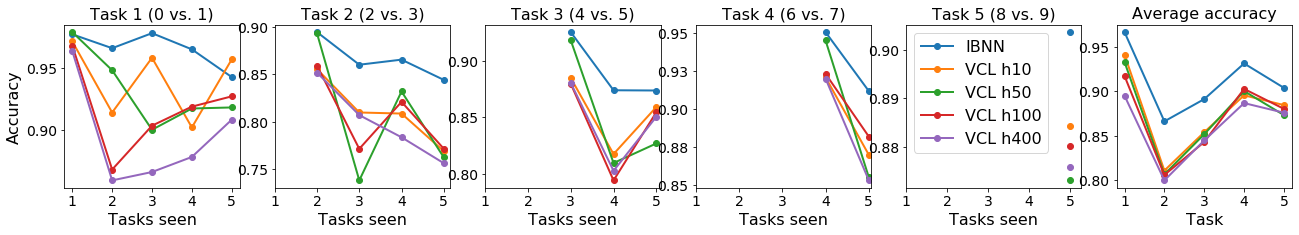

In [373]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h10[:, i]))+1, _vcl_result_h10[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size, loc='upper left')
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h10, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h400, label='VCL h400', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/accs_split_image_cl1_l1.pdf", bbox_inches='tight')
fig.show()

In [374]:
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result_h10), np.nanmean(np.nanstd(vcl_result_h10, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h400), np.nanmean(np.nanstd(vcl_result_h400, 0))))

Overall accuracies IBP: 0.9156278702278187, pm 0.012168977335323591
Overall accuracies VCL h10: 0.8789120000998178 pm 0.022363208821993424
Overall accuracies VCL h50: 0.8745120741837208 pm 0.03588567768291211
Overall accuracies VCL h100: 0.8681924813288489 pm 0.03162752898764158
Overall accuracies VCL h400: 0.857106884529193 pm 0.03832301228680355


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [375]:
mus = [0.8789120000998178, 0.8745120741837208, 0.8681924813288489, 0.857106884529193]
stds = [0.022363208821993424, 0.03588567768291211, 0.03162752898764158, 0.03832301228680355]
print(mix_gaussian_moments(mus, stds))

(0.8696808600353951, 0.033636749026984866)


In [376]:
print('{0:.1f} ({1:.1f})'.format(np.median(mus)*100, (np.max(mus) - np.min(mus))*100))

87.1 (2.2)


In [377]:
print('{0:.1f} ({1:.1f}) ({2:.1f})'.format(np.median(mus)*100, np.max(mus)*100, np.min(mus)*100))

87.1 (87.9) (85.7)


In [240]:
Z_ibp = d['Z']
len(Z_ibp[0])

5

In [241]:
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

NameError: name 'num_tasks' is not defined

In [242]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_background_ibp_mh.pdf', bbox_inches='tight')
plt.show()

NameError: name 'fig_size' is not defined

# CL2

In [528]:
with open('results/split_mnist_background_mh_cl2.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [529]:
with open('results/split_mnist_vcl_h10_images_cl2_.pkl', 'rb') as input_file:
    d_bl10 = pickle.load(input_file)
d_bl10.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [530]:
with open('results/split_mnist_vcl_h400_images_cl2_.pkl', 'rb') as input_file:
    d_bl400 = pickle.load(input_file)
d_bl400.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [531]:
with open('results/split_mnist_ibp_img_cl2_rs_nn_lr.pkl', 'rb') as input_file:
    d_rs = pickle.load(input_file)
d_rs.keys()

dict_keys(['vcl_ibp', 'uncerts_ibp', 'Z', 'ts', 'opt_thetas'])

In [534]:
print([np.nanmean(d_rs['vcl_ibp'][i,:,:,:]) for i in range(2)])

[0.8816612091263134, 0.8052011695800629]


In [536]:
ibp_acc = d['vcl_ibp']
ibp_acc_rs = d_rs['vcl_ibp'][1,:,:,:]
vcl_result_h10 = d_bl10['vcl_baselines'][10][1,:,:,:]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
vcl_result_h400 = d_bl400['vcl_baselines'][400][1,:,:,:]
_ibp_acc = np.mean(ibp_acc, 0)
_ibp_acc_rs = np.mean(ibp_acc_rs, 0)
_vcl_result_h10 = np.mean(vcl_result_h10, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h400 = np.mean(vcl_result_h400, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__ibp_acc_rs = np.nanmean(ibp_acc_rs, (0,1))
__vcl_result_h10 = np.nanmean(vcl_result_h10, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))
__vcl_result_h400 = np.nanmean(vcl_result_h400, (0,1))

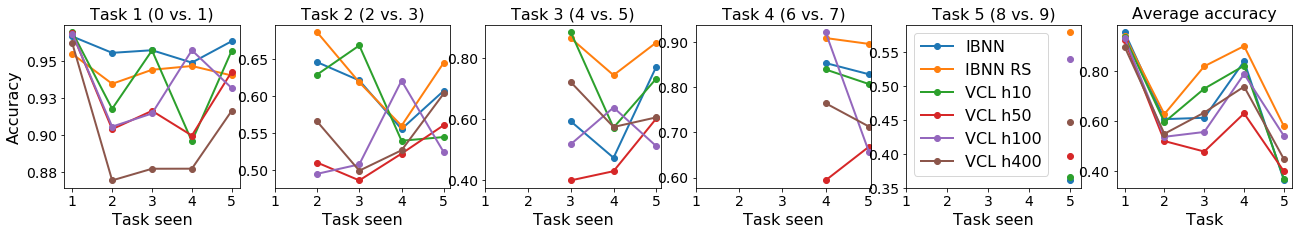

In [537]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_acc_rs[:, i]))+1, _ibp_acc_rs[:, i], label='IBNN RS', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h10[:, i]))+1, _vcl_result_h10[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Task seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc_rs))+1, __ibp_acc_rs, label='IBNN RS', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h10, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h400, label='VCL h400', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_background_l1_sh.pdf", bbox_inches='tight')
fig.show()

In [538]:
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies IBP RS: {0}, pm {1}".format(np.nanmean(ibp_acc_rs), np.nanmean(np.nanstd(ibp_acc_rs, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result_h10), np.nanmean(np.nanstd(vcl_result_h10, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h400), np.nanmean(np.nanstd(vcl_result_h400, 0))))

Overall accuracies IBP: 0.7403616925211611, pm 0.12607677909479
Overall accuracies IBP RS: 0.8052011695800629, pm 0.07767347413112917
Overall accuracies VCL h10: 0.7522586123024484 pm 0.1130232451901932
Overall accuracies VCL h50: 0.6532656950679017 pm 0.07508571211125824
Overall accuracies VCL h100: 0.7073929917929799 pm 0.0948821966087831
Overall accuracies VCL h400: 0.7015095119206053 pm 0.1266138192007019


In [384]:
mus = [0.7522586123024484, 0.6532656950679017, 0.7073929917929799, 0.7015095119206053]
stds = [0.1130232451901932, 0.07508571211125824, 0.0948821966087831, 0.1266138192007019]
print(mix_gaussian_moments(mus, stds))

(0.7036067027709838, 0.10996109324905999)


In [385]:
print('{0:.1f} ({1:.1f})'.format(np.median(mus)*100, (np.max(mus) - np.min(mus))*100))

70.4 (9.9)


In [386]:
print('{0:.1f} ({1:.1f}) ({2:.1f})'.format(np.median(mus)*100, np.max(mus)*100, np.min(mus)*100))

70.4 (75.2) (65.3)


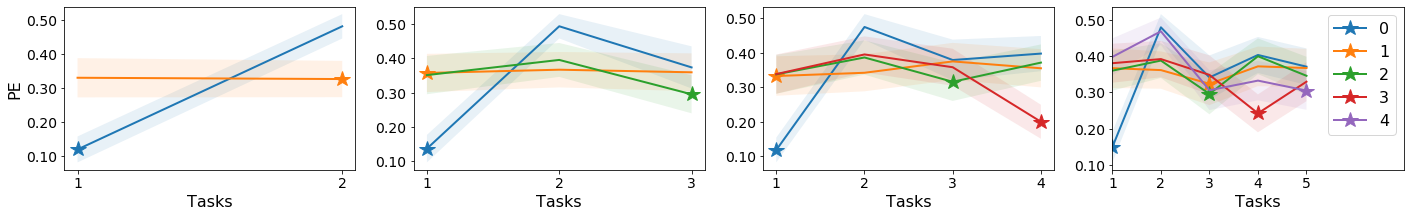

In [539]:
plot_uncerts(d_rs['uncerts_ibp'])

## CL3

In [477]:
with open('results/split_mnist_split_images_l1_cl3.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [478]:
with open('results/split_mnist_vcl_h400_images_cl3_.pkl', 'rb') as input_file:
    d_bl400 = pickle.load(input_file)
d_bl400.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [479]:
with open('results/split_mnist_vcl_h10_images_cl3_.pkl', 'rb') as input_file:
    d_bl10 = pickle.load(input_file)
d_bl10.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [480]:
with open('results/split_mnist_ibp_img_cl3_rs.pkl', 'rb') as input_file:
    d_rs = pickle.load(input_file)
d_rs.keys()

dict_keys(['vcl_ibp', 'uncerts_ibp', 'Z', 'ts', 'opt_thetas'])

In [481]:
np.nanmean(d_rs['vcl_ibp'][1,:,:,:])

0.5441579021630335

In [482]:
with open('results/split_mnist_ibp_new_cl3_rs_n_lr.pkl', 'rb') as input_file:
    d_rs = pickle.load(input_file)
d_rs.keys()

dict_keys(['vcl_ibp', 'uncerts_ibp', 'Z', 'ts', 'opt_thetas'])

In [494]:
[np.nanmean(d_rs['vcl_ibp'][i,:,:,:]) for i in range(2)]

[0.8821791876554488, 0.662068097972697]

In [484]:
with open('results/split_mnist_ibp_new_cl3_ts_rs.pkl', 'rb') as input_file:
    d_rs_ts = pickle.load(input_file)
d_rs_ts.keys()

dict_keys(['vcl_ibp', 'uncerts_ibp', 'Z', 'ts', 'opt_thetas'])

In [495]:
[np.nanmean(d_rs_ts['vcl_ibp'][i,:,:,:]) for i in range(2)]

[0.8368070298433304, 0.6435678173549879]

In [487]:
ibp_acc = d['vcl_ibp']
ibp_acc_rs = d_rs['vcl_ibp'][1,:,:,:]
ibp_acc_rs_ts = d_rs_ts['vcl_ibp'][1,:,:,:]
vcl_result_h10 = d_bl10['vcl_baselines'][10][1,:,:,:]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
vcl_result_h400 = d_bl400['vcl_baselines'][400][1,:,:,:]
_ibp_acc = np.mean(ibp_acc, 0)
_ibp_acc_rs = np.mean(ibp_acc_rs, 0)
_ibp_acc_rs_ts = np.mean(ibp_acc_rs_ts, 0)
_vcl_result_h10 = np.mean(vcl_result_h10, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h400 = np.mean(vcl_result_h400, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__ibp_acc_rs = np.nanmean(ibp_acc_rs, (0, 1))
__ibp_acc_rs_ts = np.nanmean(ibp_acc_rs_ts, (0, 1))
__vcl_result_h10 = np.nanmean(vcl_result_h10, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))
__vcl_result_h400 = np.nanmean(vcl_result_h400, (0,1))

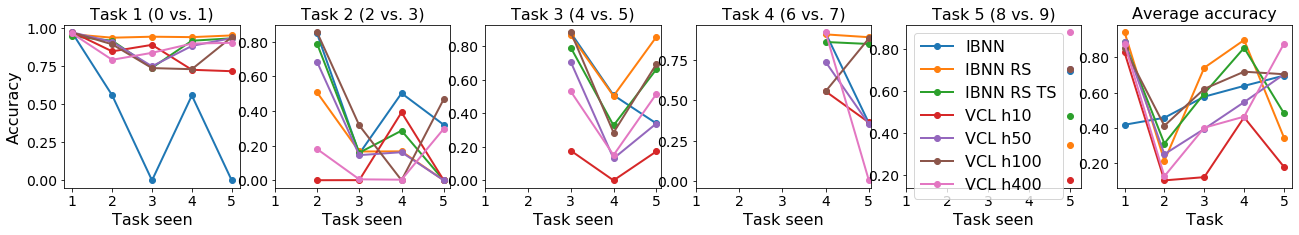

In [488]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_acc_rs[:, i]))+1, _ibp_acc_rs[:, i], label='IBNN RS', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_acc_rs_ts[:, i]))+1, _ibp_acc_rs_ts[:, i], label='IBNN RS TS', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h10[:, i]))+1, _vcl_result_h10[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Task seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc_rs))+1, __ibp_acc_rs, label='RS IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc_rs_ts))+1, __ibp_acc_rs_ts, label='RS TS IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h10, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h400, label='VCL h400', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_background_l1_sh.pdf", bbox_inches='tight')
fig.show()

In [489]:
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies IBP RS: {0}, pm {1}".format(np.nanmean(ibp_acc_rs), np.nanmean(np.nanstd(ibp_acc_rs, 0))))
print("Overall accuracies IBP RS TS: {0}, pm {1}".format(np.nanmean(ibp_acc_rs_ts), np.nanmean(np.nanstd(ibp_acc_rs_ts, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result_h10), np.nanmean(np.nanstd(vcl_result_h10, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h400), np.nanmean(np.nanstd(vcl_result_h400, 0))))

Overall accuracies IBP: 0.5070569855664688, pm 0.24343779016673878
Overall accuracies IBP RS: 0.662068097972697, pm 0.1335088024896495
Overall accuracies IBP RS TS: 0.6435678173549879, pm 0.16353962633570604
Overall accuracies VCL h10: 0.39899959718511674 pm 0.21207926702503455
Overall accuracies VCL h50: 0.5601507341564663 pm 0.24603061346529154
Overall accuracies VCL h100: 0.66072359438378 pm 0.20732530576630487
Overall accuracies VCL h400: 0.525150896809701 pm 0.13805320797965764


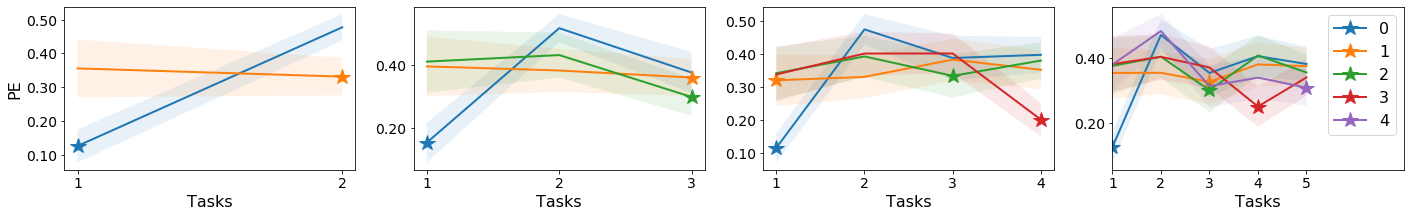

In [492]:
plot_uncerts(d_rs['uncerts_ibp'])

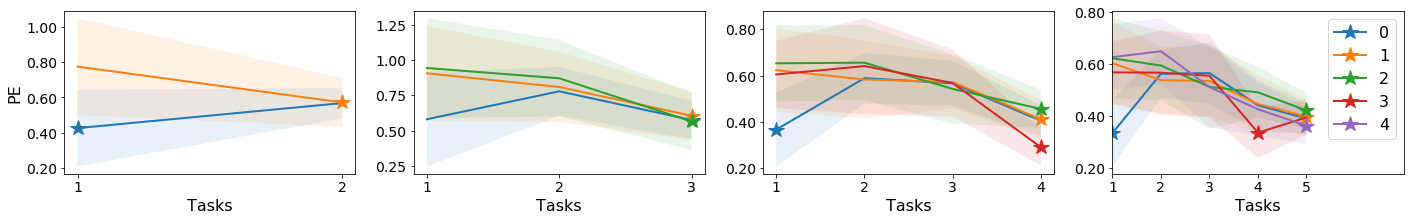

In [493]:
plot_uncerts(d_rs_ts['uncerts_ibp'])

In [393]:
mus = [0.39899959718511674, 0.5601507341564663, 0.66072359438378, 0.525150896809701]
stds = [0.21207926702503455, 0.24603061346529154, 0.20732530576630487, 0.13805320797965764]
print(mix_gaussian_moments(mus, stds))

(0.5362562056337661, 0.2250427363363583)


In [394]:
print('{0:.1f} ({1:.1f})'.format(np.median(mus)*100, (np.max(mus) - np.min(mus))*100))

54.3 (26.2)


In [395]:
print('{0:.1f} ({1:.1f}) ({2:.1f})'.format(np.median(mus)*100, np.max(mus)*100, np.min(mus)*100))

54.3 (66.1) (39.9)


## Permuted MNIST

In [497]:
with open('../ddm/results/permuted_mnist_res5_perm_l1_mh_new.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [498]:
with open('../ddm/results/permuted_mnist_res5_perm_l1_mh.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [499]:
with open('../ddm/results/permuted_mnist_res5_perm_mh_bl100.pkl', 'rb') as input_file:
    d_bl100 = pickle.load(input_file)
d_bl100.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [500]:
with open('results/permuted_mnist_vcl_bl_perm_cl1_.pkl', 'rb') as input_file:
    d_bl = pickle.load(input_file)
d_bl['vcl_baselines'].keys()

dict_keys([10, 400])

In [501]:
Z_ibp = d['Z']
[item.shape for item in Z_ibp[4]]

[(1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100)]

In [502]:
ibp_acc = d['vcl_ibp'] # 5, 5, 5
vcl_result_h5 = d_baselines['vcl_baselines'][5]
vcl_result_h10 = d_bl['vcl_baselines'][10][0,:,:,:]
vcl_result_h50 = d_baselines['vcl_baselines'][50]
vcl_result_h100 = d_bl100['vcl_baselines'][100]
vcl_result_h400 = d_bl['vcl_baselines'][400][0,:,:,:]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h10 = np.mean(vcl_result_h10, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h400 = np.mean(vcl_result_h400, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h10 = np.nanmean(vcl_result_h10, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))
__vcl_result_h400 = np.nanmean(vcl_result_h400, (0,1))

In [402]:
vcl_result_h10.shape

(5, 5, 5)

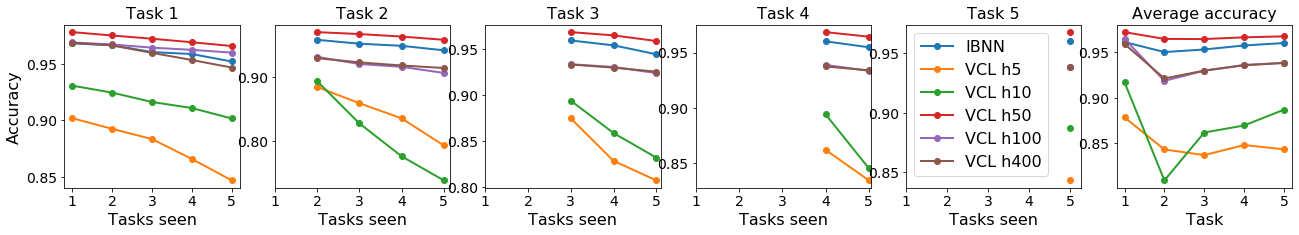

In [403]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1",
          1: "Task 2",
          2: "Task 3",
          3: "Task 4",
          4: "Task 5"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h10[:, i]))+1, _vcl_result_h10[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h10, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h400, label='VCL h400', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/accs_perm_cl1.pdf", bbox_inches='tight')
fig.show()

In [404]:
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result_h10), np.nanmean(np.nanstd(vcl_result_h10, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h400), np.nanmean(np.nanstd(vcl_result_h400, 0))))

Overall accuracies IBP: 0.9560959999999998, pm 0.002011861533081928
Overall accuracies VCL h10: 0.8686004354380356 pm 0.011059412909843193
Overall accuracies VCL h50: 0.967593333333333 pm 0.0013626490255064343
Overall accuracies VCL h100: 0.9397761208598625 pm 0.0017017417870295428
Overall accuracies VCL h400: 0.9385653877560096 pm 0.0031119143347685904


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [405]:
mus = [0.8686004354380356, 0.967593333333333, 0.9397761208598625, 0.9385653877560096]
stds = [0.011059412909843193, 0.0013626490255064343, 0.0017017417870295428, 0.0031119143347685904]
print(mix_gaussian_moments(mus, stds))

(0.9286338193468101, 0.037018188805952194)


In [406]:
print('{0:.1f} ({1:.1f})'.format(np.median(mus)*100, (np.max(mus) - np.min(mus))*100))

93.9 (9.9)


In [407]:
print('{0:.1f} ({1:.1f}) ({2:.1f})'.format(np.median(mus)*100, np.max(mus)*100, np.min(mus)*100))

93.9 (96.8) (86.9)


In [341]:
Z_ibp = d['Z']
[item.shape for item in Z_ibp[1]]

[(1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100)]

In [507]:
Z_ibp = d['Z']

num_runs = 5
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

In [508]:
__Z_ibp[0].shape

(50000, 100)

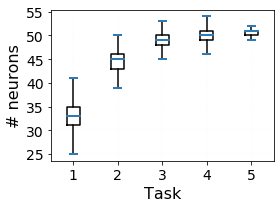

In [511]:
fig_size = (4, 3)
plt.figure(figsize=fig_size)
grid_color = '0.1'
grid_lw = 0.2

if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks) * 2 - 1)
plt.ylabel('# neurons', fontsize=legend_size)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_perm_mh_ibp.pdf', bbox_inches='tight')
plt.show()

/nfs/home/samuelk/IBP_BNN/ddm/visualise.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


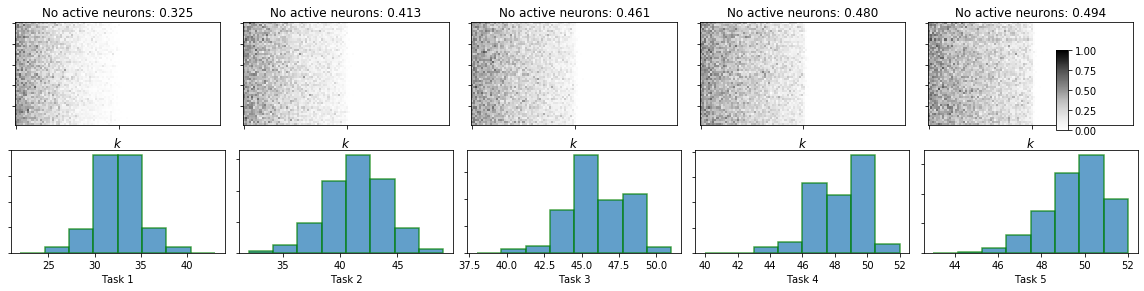

In [68]:
from visualise import plot_Zs
num_layers=1
Zs=Z_ibp[1]
dataset='perm'
tag='cl1'
plot_Zs(num_tasks, num_layers, Zs, dataset, tag)

## Variation with h

In [3]:
# permuted_mnist_res5_l1_mh_new.pkl
with open('../ddm/results/permuted_mnist_res5_l1_mh_new.pkl', 'rb') as input_file:
    d_vcl = pickle.load(input_file)
d_vcl['vcl_baselines'].keys()

dict_keys([10, 20, 100, 200, 400, 800])

In [4]:
vcl_result_h10 = d_vcl['vcl_baselines'][10]
vcl_result_h20 = d_vcl['vcl_baselines'][20]
vcl_result_h100 = d_vcl['vcl_baselines'][100]
vcl_result_h200 = d_vcl['vcl_baselines'][200]
vcl_result_h400 = d_vcl['vcl_baselines'][400]
vcl_result_h800 = d_vcl['vcl_baselines'][800]

# _ibp_acc = np.mean(ibp_acc, 0)
# _vcl_result_h5 = np.mean(vcl_result_h5, 0)
# _vcl_result_h50 = np.mean(vcl_result_h50, 0)
# _vcl_result_h100 = np.mean(vcl_result_h100, 0)
# __ibp_acc = np.nanmean(ibp_acc, (0,1))
# __vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
# __vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
# __vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

In [11]:
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result_h10), np.nanmean(np.nanstd(vcl_result_h10, 0))))
print("Overall accuracies VCL h20: {0} pm {1}".format(np.nanmean(vcl_result_h20), np.nanmean(np.nanstd(vcl_result_h20, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))
print("Overall accuracies VCL h200: {0} pm {1}".format(np.nanmean(vcl_result_h200), np.nanmean(np.nanstd(vcl_result_h200, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h400), np.nanmean(np.nanstd(vcl_result_h400, 0))))
print("Overall accuracies VCL h800: {0} pm {1}".format(np.nanmean(vcl_result_h800), np.nanmean(np.nanstd(vcl_result_h800, 0))))

Overall accuracies VCL h5: 0.8540106666666666 pm 0.009992434791613429
Overall accuracies VCL h10: 0.8637095068376275 pm 0.01616462927127806
Overall accuracies VCL h20: 0.9088298390183267 pm 0.006695536378857124
Overall accuracies VCL h50: 0.967593333333333 pm 0.0013626490255064343
Overall accuracies VCL h100: 0.9397761208598625 pm 0.0017017417870295428
Overall accuracies VCL h200: 0.9418002634712414 pm 0.0037809465799702015
Overall accuracies VCL h400: 0.9384276767420867 pm 0.001934636880943343
Overall accuracies VCL h800: 0.9362017274305285 pm 0.0018195453112221408


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [12]:
(0.967593333333333-0.8540106666666666) * 100

11.358266666666639

In [421]:
xs = [5, 10, 20, 50, 100, 200, 400, 800]
res = [vcl_result_h5, vcl_result_h10, vcl_result_h20, vcl_result_h50, vcl_result_h100, vcl_result_h200,
      vcl_result_h400, vcl_result_h800]
accs = [np.nanmean(i) for i in res]
stds = [np.nanmean(np.nanstd(i, 0)) for i in res]
acc_ibp = np.nanmean(ibp_acc)
acc_std_ibp = np.nanmean(np.nanstd(ibp_acc, 0))

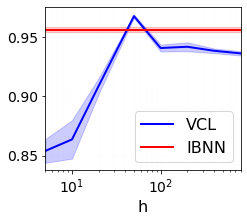

In [426]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

fig, ax = plt.subplots(1, 1, figsize=(3.5, 3))
ax.plot(xs, accs, linewidth=lw, color='b')
ax.fill_between(xs,
               [x - y for x, y in zip(accs, stds)],
               [x + y for x, y in zip(accs, stds)],
               alpha=0.2, color='b')
ax.plot(xs, [acc_ibp]*len(accs), linewidth=lw, color='r')
ax.fill_between(xs,
               [x - y for x, y in zip([acc_ibp]*len(accs), [acc_std_ibp]*len(accs))],
               [x + y for x, y in zip([acc_ibp]*len(accs), [acc_std_ibp]*len(accs))],
               alpha=0.2, color='r')
#ax.axvline(50, c='c')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.legend(['VCL', 'IBNN'], fontsize=legend_size, loc='lower right')
plt.xscale('log')
#ax.set_title('', fontsize=legend_size)
#ax.set_xticks(range(1, len(_ibp_acc[:,i])+1))
ax.set_xlim(5, 800)
ax.set_xlabel('h', fontsize=legend_size)
#import matplotlib.ticker as mticker
#ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
#ax.yaxis.get_major_formatter().set_scientific(False)
#ax.yaxis.get_major_formatter().set_useOffset(False)
#ax.ticklabel_format(useOffset=False, style='plain')
#ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())
ax.tick_params(labelsize=tick_size)
#ax.set_ylabel('Accuracy', fontsize=legend_size)
#ax[5].legend()
plt.savefig("plots/accs_perm_h_study.pdf", bbox_inches='tight')
fig.show()

# CL2

In [408]:
with open('../ddm/results/permuted_mnist_res5_perm_l1_sh_new.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [409]:
with open('../ddm/results/permuted_mnist_res5_perm_l1_sh.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [410]:
with open('../ddm/results/permuted_mnist_res5_perm_sh_bl100.pkl', 'rb') as input_file:
    d_bl100 = pickle.load(input_file)
d_bl100.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [411]:
with open('results/permuted_mnist_vcl_h10_perm_cl2_.pkl', 'rb') as input_file:
    d_bl10 = pickle.load(input_file)
d_bl10.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [412]:
with open('results/permuted_mnist_vcl_h400_perm_cl2_.pkl', 'rb') as input_file:
    d_bl400 = pickle.load(input_file)
d_bl400.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [413]:
Zs_ibp = d['Z']
[item.shape for item in Zs_ibp[4]]

[(1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100)]

In [414]:
ibp_acc = d['vcl_ibp'] # 5, 5, 5
vcl_result_h10 = d_bl10['vcl_baselines'][10][0,:,:,:]
vcl_result_h50 = d_baselines['vcl_baselines'][50]
vcl_result_h100 = d_bl100['vcl_baselines'][100]
vcl_result_h400 = d_bl400['vcl_baselines'][400][0,:,:,:]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h10 = np.mean(vcl_result_h10, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h400 = np.mean(vcl_result_h400, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h10 = np.nanmean(vcl_result_h10, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))
__vcl_result_h400 = np.nanmean(vcl_result_h400, (0,1))

In [415]:
vcl_result_h10.shape

(5, 5, 5)

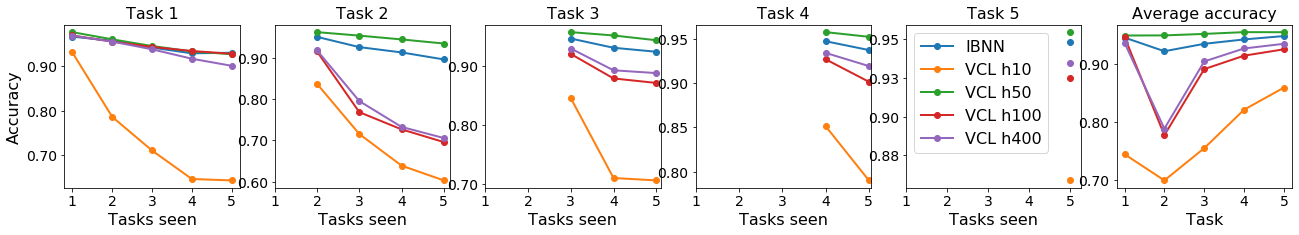

In [416]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1",
          1: "Task 2",
          2: "Task 3",
          3: "Task 4",
          4: "Task 5"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h10[:, i]))+1, _vcl_result_h10[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h10, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h400, label='VCL h400', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_perm_l1_sh.pdf", bbox_inches='tight')
fig.show()

In [417]:
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result_h10), np.nanmean(np.nanstd(vcl_result_h10, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h400), np.nanmean(np.nanstd(vcl_result_h400, 0))))

Overall accuracies IBP: 0.9365973333333333, pm 0.00613091630882523
Overall accuracies VCL h10: 0.751810337516326 pm 0.041304332401392835
Overall accuracies VCL h50: 0.9506226666666665 pm 0.003899653522012814
Overall accuracies VCL h100: 0.8842732859764421 pm 0.01870146503533352
Overall accuracies VCL h400: 0.8888822389252579 pm 0.011650153156675698


In [418]:
mus = [0.751810337516326, 0.9506226666666665, 0.8842732859764421, 0.8888822389252579]
stds = [0.041304332401392835, 0.003899653522012814, 0.01870146503533352, 0.011650153156675698]
print(mix_gaussian_moments(mus, stds))

(0.8688971322711732, 0.07620849215260347)


In [419]:
print('{0:.1f} ({1:.1f})'.format(np.median(mus)*100, (np.max(mus) - np.min(mus))*100))

88.7 (19.9)


In [420]:
print('{0:.1f} ({1:.1f}) ({2:.1f})'.format(np.median(mus)*100, np.max(mus)*100, np.min(mus)*100))

88.7 (95.1) (75.2)


In [324]:
Z_ibp = d['Z']

num_runs = 5
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

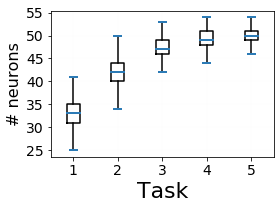

In [325]:
fig_size=(4, 3)
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2-1)
plt.ylabel('# neurons', fontsize=legend_size)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_ibp_perm_sh.pdf', bbox_inches='tight')
plt.show()

In [311]:
# permuted_mnist_res5_perm_l1_mh_new
# split_mnist_res5_split_normal_l1_mh
with open('results/split_mnist_res5_split_normal_l1_mh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [312]:
Z_ibp = d['Z']

num_runs = 5
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp_a = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

In [313]:
# split_mnist_res5_random_mh
# split_mnist_res5_background_mh
with open('results/split_mnist_res5_random_mh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [314]:
Z_ibp = d['Z']

num_runs = 5
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp_b = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

In [315]:
##### Box plot params

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 14
legend_size = 16

num_layers = 2
num_tasks = 5
ticks = [str(i) for i in np.arange(5)+1]
fig_size=(4, 3)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color='black', lw=1.5)
    plt.setp(bp['whiskers'], color='black', lw=1.5)
    plt.setp(bp['caps'], color=color, lw=2)
    plt.setp(bp['medians'], color=color, lw=2)

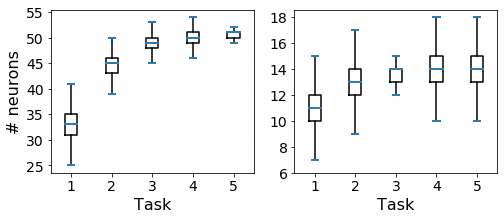

In [310]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
bpr = ax[0].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp_a[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
set_box_color(bpr, '#2C7BB6')

bpl = ax[1].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp_b[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
set_box_color(bpl, '#2C7BB6')

for i in range(2):
    plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
    ax[i].set_xticks(range(0, len(ticks) * 2, 2)) 
    ax[i].set_xticklabels(ticks, fontsize=tick_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].set_xlim(-1, len(ticks)*2 -1)
    ax[i].set_xlabel('Task', fontsize=legend_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
ax[0].set_yticks(range(25, 60, 5))
ax[1].set_yticks(range(6, 20, 2))
ax[0].set_ylabel('# neurons', fontsize=legend_size)
#plt.tight_layout()
#ax[0].set_title('H-IBP', fontsize=legend_size)
#ax[1].set_title('IBP', fontsize=legend_size)
plt.savefig('plots/Zs_bp_perm_mnistb_l1.pdf', bbox_inches='tight')
plt.show()

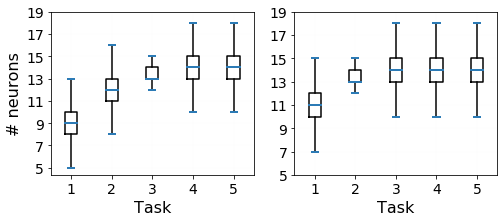

In [316]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
bpr = ax[0].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp_a[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
set_box_color(bpr, '#2C7BB6')

bpl = ax[1].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp_b[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
set_box_color(bpl, '#2C7BB6')

for i in range(2):
    plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
    ax[i].set_xticks(range(0, len(ticks) * 2, 2)) 
    ax[i].set_xticklabels(ticks, fontsize=tick_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].set_xlim(-1, len(ticks)*2 -1)
    ax[i].set_xlabel('Task', fontsize=legend_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
ax[0].set_yticks(range(5, 20, 2))
ax[1].set_yticks(range(5, 20, 2))
ax[0].set_ylabel('# neurons', fontsize=legend_size)
#plt.tight_layout()
#ax[0].set_title('H-IBP', fontsize=legend_size)
#ax[1].set_title('IBP', fontsize=legend_size)
plt.savefig('plots/Zs_bp_mnist_mnistr_l1.pdf', bbox_inches='tight')
plt.show()

In [326]:
with open('results/split_mnist_res5_split_normal_l1_sh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
Z_ibp = d['Z']

num_runs = 5
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp_a = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

In [327]:
with open('results/split_mnist_res5_ibp_rs_split_random_random_l1_rs_sh.pkl', 'rb') as input_file:
    d_rs = pickle.load(input_file)
Z_ibp = d_rs['Z']

num_runs = 5
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp_b = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

In [328]:
with open('results/split_mnist_res5_split_normal_l1_mh.pkl', 'rb') as input_file:
    d_rs = pickle.load(input_file)
Z_ibp = d_rs['Z']

num_runs = 5
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp_c = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

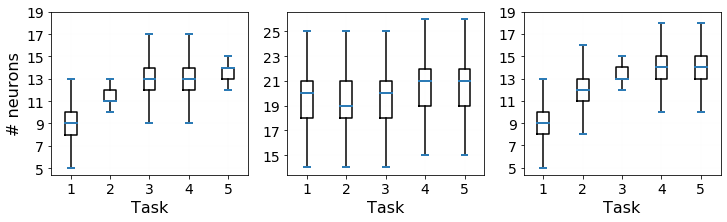

In [333]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
bpr = ax[0].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp_a[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
set_box_color(bpr, '#2C7BB6')

bpl = ax[1].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp_b[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
set_box_color(bpl, '#2C7BB6')

bpl = ax[2].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp_c[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
set_box_color(bpl, '#2C7BB6')

for i in range(3):
    plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
    ax[i].set_xticks(range(0, len(ticks) * 2, 2)) 
    ax[i].set_xticklabels(ticks, fontsize=tick_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].set_xlim(-1, len(ticks)*2 -1)
    ax[i].set_xlabel('Task', fontsize=legend_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
ax[0].set_yticks(range(5, 20, 2))
ax[1].set_yticks(range(15, 27, 2))
ax[2].set_yticks(range(5, 20, 2))
ax[0].set_ylabel('# neurons', fontsize=legend_size)
#plt.tight_layout()
plt.savefig('plots/Zs_bp_mnist_mnistr_mnistb_cl2_l1.pdf', bbox_inches='tight')
plt.show()

## CL3

In [421]:
with open('results/permuted_mnist_perm_l1_mh_new_cl3.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [422]:
d['vcl_baselines'].keys()

dict_keys([5, 50, 100])

In [423]:
with open('results/permuted_mnist_vcl_h10_perm_cl3_.pkl', 'rb') as input_file:
    d_bl10 = pickle.load(input_file)
d_bl10.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [424]:
with open('results/permuted_mnist_vcl_h400_perm_cl3_.pkl', 'rb') as input_file:
    d_bl400 = pickle.load(input_file)
d_bl400.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [425]:
ibp_acc = d['vcl_ibp'] # 5, 5, 5
print(ibp_acc.shape)
vcl_result_h10 = d_bl10['vcl_baselines'][10][1,:,:,:]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
vcl_result_h400 = d_bl400['vcl_baselines'][400][1,:,:,:]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h400 = np.mean(vcl_result_h400, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))
__vcl_result_h400 = np.nanmean(vcl_result_h400, (0,1))

(5, 5, 5)


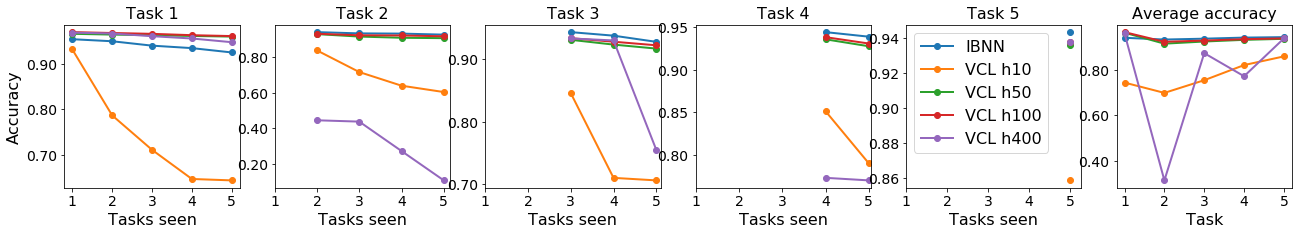

In [426]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1",
          1: "Task 2",
          2: "Task 3",
          3: "Task 4",
          4: "Task 5"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h10[:, i]))+1, _vcl_result_h10[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h10, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h400, label='VCL h400', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_perm_l1_cl3.pdf", bbox_inches='tight')
fig.show()

In [427]:
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result_h10), np.nanmean(np.nanstd(vcl_result_h10, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h400), np.nanmean(np.nanstd(vcl_result_h400, 0))))

Overall accuracies IBP: 0.9379896225506749, pm 0.0024919133459991097
Overall accuracies VCL h10: 0.4045171412056949 pm 0.03618704538382689
Overall accuracies VCL h50: 0.9362795223566047 pm 0.002216296995500788
Overall accuracies VCL h100: 0.9406673521331593 pm 0.002046669178954181
Overall accuracies VCL h400: 0.7438315006848503 pm 0.14297127548694732


In [428]:
mus = [0.4045171412056949, 0.9362795223566047, 0.9406673521331593, 0.7438315006848503]
stds = [0.03618704538382689, 0.002216296995500788, 0.002046669178954181, 0.14297127548694732]
print(mix_gaussian_moments(mus, stds))

(0.7563238790950773, 0.2302444237279167)


In [429]:
print('{0:.1f} ({1:.1f})'.format(np.median(mus)*100, (np.max(mus) - np.min(mus))*100))

84.0 (53.6)


In [430]:
print('{0:.1f} ({1:.1f}) ({2:.1f})'.format(np.median(mus)*100, np.max(mus)*100, np.min(mus)*100))

84.0 (94.1) (40.5)


In [30]:
Z_ibp = d['Z']

num_runs = 5
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

In [31]:
##### Box plot params

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 14
legend_size = 16

num_layers = 1
num_tasks = 5
ticks = [str(i) for i in np.arange(5)+1]
fig_size=(4, 3)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color='black', lw=1.5)
    plt.setp(bp['whiskers'], color='black', lw=1.5)
    plt.setp(bp['caps'], color=color, lw=2)
    plt.setp(bp['medians'], color=color, lw=2)

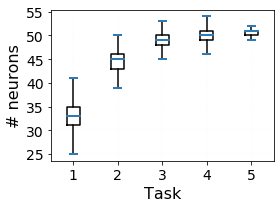

In [32]:
fig_size=(4, 3)
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2-1)
plt.ylabel('# neurons', fontsize=legend_size)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
#plt.savefig('plots/Zs_bp_ibp_perm_sh.pdf', bbox_inches='tight')
plt.show()